# Udacity DataAnalyst Nanodegree

## Project: Investigate a dataset
### Dataset chosen: Kaggle Titanic

##### The Kaggle Titanic dataset is used as an example dataset for introducing the user to data analysis and machine learning. In this project no machine learning is required. Therefore I will concentrate on the analysis of the data only and specifically on those aspects related to the survival probability of passengers.

##### The main question to address are (together with subquestions):

- What factors made people more likely to survive?
    - Is gender affecting survival probability?
    - Is Social status affecting survival?
    - Is Age affecting survival?
    - Is embarkment place affecting survival?
- Can we extract hidden information from the dataset to improve prediction of survival?
    - Feature engineering: is it possible to extract valuable information from more cryptic variables?
    - Variable correlation and feature reduction: a correlation analysis may be useful to identify feature   independence.
    

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_rows", 10)

### Dataset features
    - There are 891 passengers in the dataset
    - Each instance has 12 features, 9 numerical or pseudonumerical (categorical with few classes) and 3 non numerical (see below for explanation on the meaning of the features),
    - See below a statistical description of the numerical dataset features

In [129]:
path = "data/data.csv"
data = pd.read_csv(path)
print ("Number of passengers:" , len(data))

Number of passengers: 891


##### Here it follows the header of the dataset showing all the features contained in the dataset, a description of the feature meaning, and basic statistic evaluated only for numerical variables

In [130]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- PassengerId (integer): Identification number for each passenger in the dataset.

- Survived (boolean): It can take values 0 (1) when a passenger dies (survives).

- Pclass (integer): It can take values 1, 2, 3, indicating high, middle or low class.

- Name (string): The name of the passenger. It may contain also status indicators (Mr. , Mrs., Dr. ...).

- Sex (string): Either "male" or "female".

- Age (float): The age can be an integer or a float in the case when it is estimated.

- SibSp (integer): Number of siblings and spouses on board.

- Parch (integer): Number of parents and children on board.

- Ticket (serial number): Ticket number.

- Fare (float): Price of the ticket.

- Cabin (serial number): Cabin rented (if any).

- Embarked (char): Place of embarkment, either "S" (Southampton), "C" (Cherbourg) or "Q" (Queenstown). Some NaN values present.

In [131]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### NaN values

    - Below the number of NaN values for each variable.
    - The age variable is missing in many instances. Does it make sense to drop it for survival reasoning? There are three ways we can follow:
            - drop the column: we may lose critical information
            - eliminate all the instances which have NaN age: leads to a 20% dataset reduction
            - substitute the NaN values with some estimated value: we need to find a consistent way to do it.
    - The Cabin is missing in about 77% of the instances. This variable informative content should then be low in respect to others. I will consider this variable later as an example of feature engineering.
    
    
    

In [132]:
for k in data.keys():
    print (k, data[k].isnull().sum())

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


#### The following line drops some variables which are not used in the following analysis

In [133]:
data_cabin = data[["Survived", "Cabin", "Embarked"]] # This subset is considered later
data.drop(["PassengerId", "Cabin"],1,inplace=True)


## Variable distributions

##### In this section I consider each remaining variable alone and study the value distribution. The name and Ticket variables are for now put on the side. Moreover since the aim of the anaysis is to investigate the role of the features on the survival of the passengers, I will show the distribution for the subsets of survived and non-survived passengers.

### Age distribution

##### Question: Is Age affecting survival probability? 
    - Old people (above 65 years old) have very low chances of survival
    - Infants and very small children have higher chances of survival
    - Within intermediate age range, no conclusion about survival chances can be drawn on this variable alone.

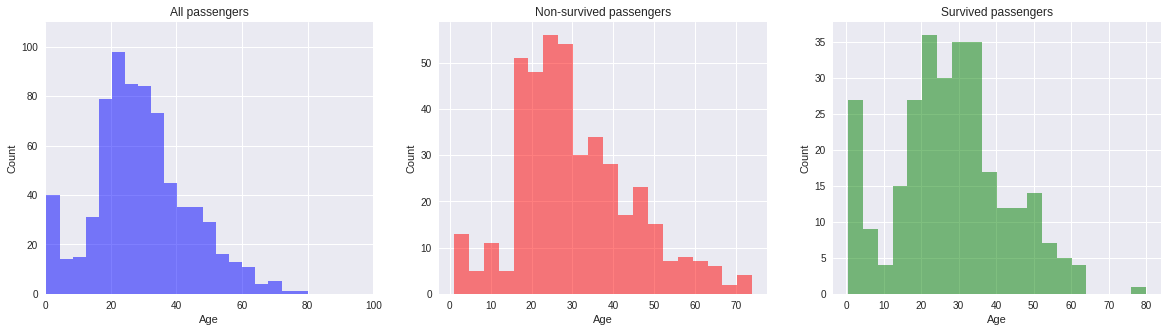

In [134]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
n, bins, patches = plt.hist(data['Age'].dropna(), 20, facecolor='blue', alpha=0.5)
plt.title("All passengers")
plt.xlabel('Age')
plt.ylabel('Count')
plt.axis([0, 100, 0, 110])
plt.grid(True)

plt.subplot(1,3,2)
n, bins, patches = plt.hist(data['Age'].dropna()[data['Survived']== 0], 20, facecolor='red', alpha=0.5)
plt.title("Non-survived passengers")
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)

plt.subplot(1,3,3)
plt.title("Survived passengers")
n, bins, patches = plt.hist(data['Age'].dropna()[data['Survived']== 1], 20, facecolor='green', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)

### Gender distribution

##### Question: Is Gender affecting survival probability?
    - This distrbution shows with clear result that most of the casualties are men, and that women have much higher chances of survival.
    - Unbalance of the dataset needs to be taken into account (There are more men than women)

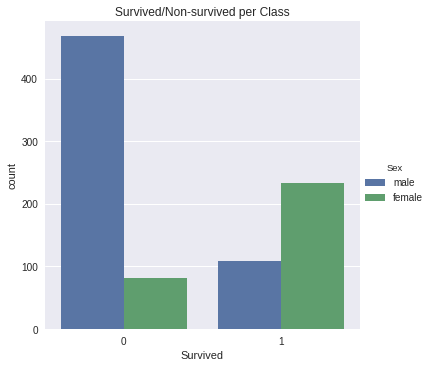

In [135]:
sns.factorplot(x = "Survived", hue = "Sex", data=data, kind = 'count', size=5);
plt.title("Survived/Non-survived per Class");

### Passenger Class

##### Question: Is social status affecting survival probability?
    - Passenger of third class have a much lower survival chance.
    - Passengers of first and second class have higher chances.

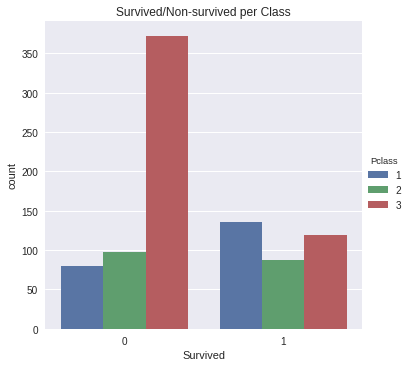

In [136]:
sns.factorplot(x = "Survived", hue = "Pclass", data=data, kind = 'count', size=5);
plt.title("Survived/Non-survived per Class");

## Embarkment place:

#### Question: Is Embarkment place affecting survival probability?
    - It seems there is a connection between survival and embarkment place. Passenger embarked in Cherbough seem  to have higher probability of survival. This may be related to which kind of passengers embark there and in other locations. So a correlation analysis is required (see next paragraph).

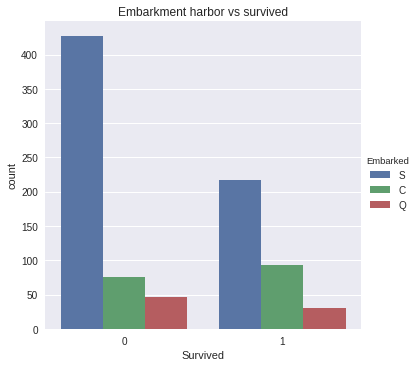

In [137]:
sns.factorplot(x = "Survived", hue = "Embarked", data=data, kind = 'count', size=5);
plt.title("Embarkment harbor vs survived");

#### Question: How are Embarkment, Pclass and Survival features connected? 

    - Most of the people embarked in Southampton (S).
    - Only third class passengers embarked from Queenstown (Q) and most of third class people embarked from Southampton.
    - Many first class passengers are embarked from Cherbourg (C).
    - The embarkment place may be related to the area of the ship that they occupied, especially for third class passengers (See Cabin variable following).

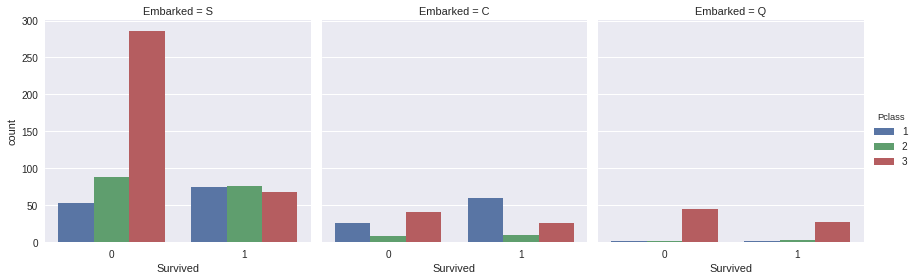

In [138]:
sns.factorplot(x = "Survived", hue = "Pclass", col="Embarked", data=data, kind = 'count', size=4);

## Study of the Cabin variable

#### This is an example of feature engineering. I collect the Cabin variable previously discarded and extract the letter in the cabin value to identify in which sector of the ship the cabin is located. I then analyze the relationship between the cabin sector and survival rate.
    - Since there are a lot of NaN values for the Cabin variable, this study may not be so useful but it is worth trying.
    - Result are a bit inconclusive apart from a tendency for passengers assigned to sector E, D and B to have higher survival probability (see next plot).
    
#### Sector analysis is useful since it gives information to where the passenger where located during the disaster. Certain areas of the ship may have undergo damage before and passengers may have been remained trapped and unable to reach safety.

In [139]:
SECTORS = ["A", "B", "C", "D", "E", "F", "G"]
def find_sector(x):
    for S in SECTORS:
        if S in x:
            return S
    return np.nan
data_cabin["Sector"] = data_cabin["Cabin"].dropna().apply(find_sector)

/home/ruggero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


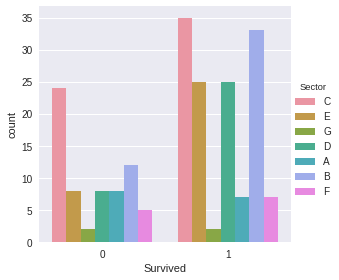

In [140]:
sns.factorplot(x = "Survived", hue = "Sector", data=data_cabin.dropna(), kind = 'count', size=4);

#### Here a similar analysis showing the distribution of people per Cabin depending on their Embarkement Harbor. However due to the low number of instances having non NaN cabin info, the information retreived is very small.

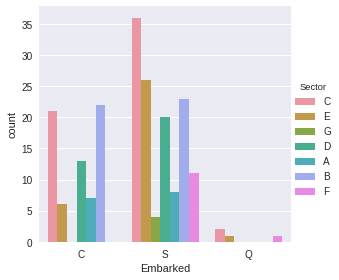

In [142]:
sns.factorplot(x = "Embarked", hue = "Sector", data=data_cabin.dropna(), kind = 'count', size=4);

### Feature correlations Study

#### In this section I consider variable cross-correlations. We are looking for variables with correlations close to 1 or -1. Below the numerical value of the correlation and a heatmap plot. They carry the same information but visualization is always useful.
    - The survival rate is correlated moslty with Gender and Pclass.
    - Degree of correlation is present also with Fare, due to the correlation between Fare and PClass.

In [78]:
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


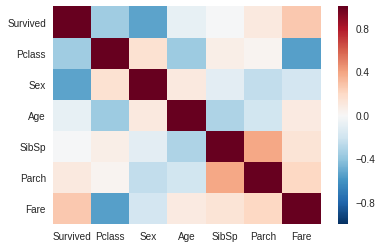

In [143]:
data['Sex'] = data['Sex'].astype('category').cat.codes
sns.heatmap(data.dropna().corr());

#### It follows a pairplot visualization using the "survived" feature as a discriminator.

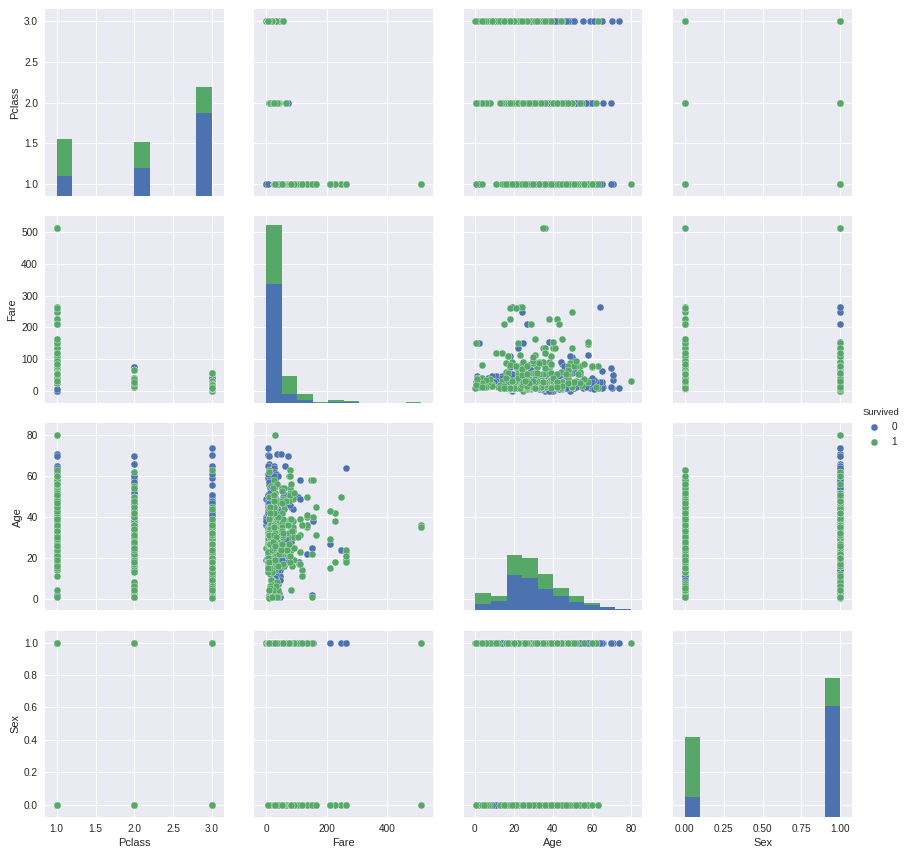

In [75]:
data['Sex'] = data['Sex'].astype('category').cat.codes
sns.pairplot(data.dropna(), hue="Survived", size=3, vars=["Pclass", "Fare", "Age", "Sex"]);

### BoxPlot visualizations

#### Even if not adding extra information from what we already got from the previous visualization, the box plot is a useful way to compare the instance distribution variable. 
    - In the next plot the Age and survival probability are put together. It shows that younger people has some chances more of survival
    - In the second plot the same visualization is done with the Fare variable. Here one can see even better how passengers that paid less for embarkment have clearly less chances of survival

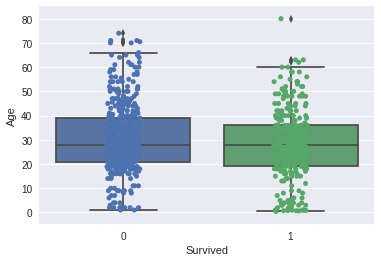

In [80]:
ax = sns.boxplot(x="Survived", y="Age", data=data.dropna())
ax = sns.stripplot(x="Survived", y="Age", data=data.dropna()
                   , jitter=True, edgecolor="gray")

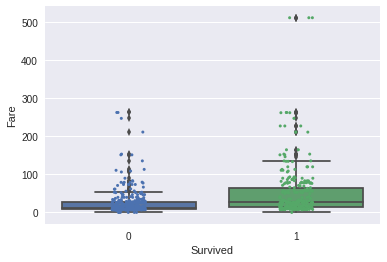

In [145]:
ax = sns.boxplot(x="Survived", y="Fare", data=data.dropna())
ax = sns.stripplot(x="Survived", y="Fare", data=data.dropna(),
                   jitter=True, edgecolor="gray", size=3)

## Conclusions

    - In this exploratory analysis I concentrated moslty on aspects that influence the survival probability of the passengers.
    - I can definitely conclude that Gender and Social Status are the best indicator for survival chance. In particular women with high social status have high chances.
    - The age variable suggests what younger people, especially infants, have higher chances in respect to older people.
    - The embarkment variable is too much imbalanced, since most of the people have been embarked from Southampton.
    - Variables like Fare are closely related to that of PClass and therefore do not add extra information about the process.
    - The attempt of feature engineering based on the Cabin variable was interesting, but too many NaN values are present.
    - Visualization tools have been useful to understand the dataset. Especially histograms, heatmaps and barpplot are useful tools to visualize what is going on.